# 2020a_OI
This notebook, associated to the configuration file *config_2020a_OI.py* runs an Optimal-Interpolation experiment to map SSH from simulated SWOT and Nadir data

## Configuration file

In [1]:
path_config = 'config_2020a_OI'

In [2]:
import sys
sys.path.append('../..')

In [3]:
from src import exp
config = exp.Exp(path_config)

name_experiment: 2020a_OI
saveoutputs: True
name_exp_save: 2020a_OI
path_save: outputs/2020a_OI
tmp_DA_path: scratch/2020a_OI
init_date: 2012-10-01 00:00:00
final_date: 2012-12-15 00:00:00
assimilation_time_step: 3:00:00
saveoutput_time_step: 1 day, 0:00:00
flag_plot: 0
write_obs: True
name_lon: lon
name_lat: lat
name_time: time
plot_time_step: 1 day, 0:00:00
time_obs_min: None
time_obs_max: None
compute_obs: False
path_obs: None

NAME_MOD is not set in the configuration file
NAME_BC is not set in the configuration file
NAME_OBSOP is not set in the configuration file
NAME_BASIS is not set in the configuration file


## State

In [4]:
from src import state as state
State = state.State(config)


super: GRID_GEO
lon_min: 295.0
lon_max: 305.0
lat_min: 33.0
lat_max: 43.0
dlon: 0.1
dlat: 0.1
name_init_mask: None
name_var_mask: {'lon': '', 'lat': '', 'var': ''}



## Observations

In [5]:
from src import obs as obs
dict_obs = obs.Obs(config,State)

Observation information will be saved in dict_obs_J1_EN_TPN_G2_20121001_20121215_295_305_33_43.txt
Reading dict_obs_J1_EN_TPN_G2_20121001_20121215_295_305_33_43.txt from previous run


## Inversion

In [6]:
from src import inv as inv
inv.Inv(config,State,dict_obs=dict_obs)

super: INV_OI
name_var: {'SSH': 'ssh'}
Lt: 7
Lx: 1
Ly: 1
sigma_R: 0.05



## Diagnostics

In [7]:
from src import diag as diag
Diag = diag.Diag(config,State)

super: DIAG_OSSE
dir_output: diags/2020a_OI
time_min: 2012-10-22 00:00:00
time_max: 2012-12-04 00:00:00
lon_min: None
lon_max: None
lat_min: None
lat_max: None
name_ref: data/dc_ref/NATL60-CJM165_GULFSTREAM*.nc
name_ref_time: time
name_ref_lon: lon
name_ref_lat: lat
name_ref_var: sossheig
options_ref: {'combine': 'nested', 'concat_dim': 'time', 'parallel': True}
name_exp_var: ssh
compare_to_baseline: True
name_bas: data/2020a_SSH_mapping_NATL60_DUACS_en_j1_tpn_g2.nc
name_bas_time: time
name_bas_lon: lon
name_bas_lat: lat
name_bas_var: gssh



In [9]:
Diag.regrid_exp()

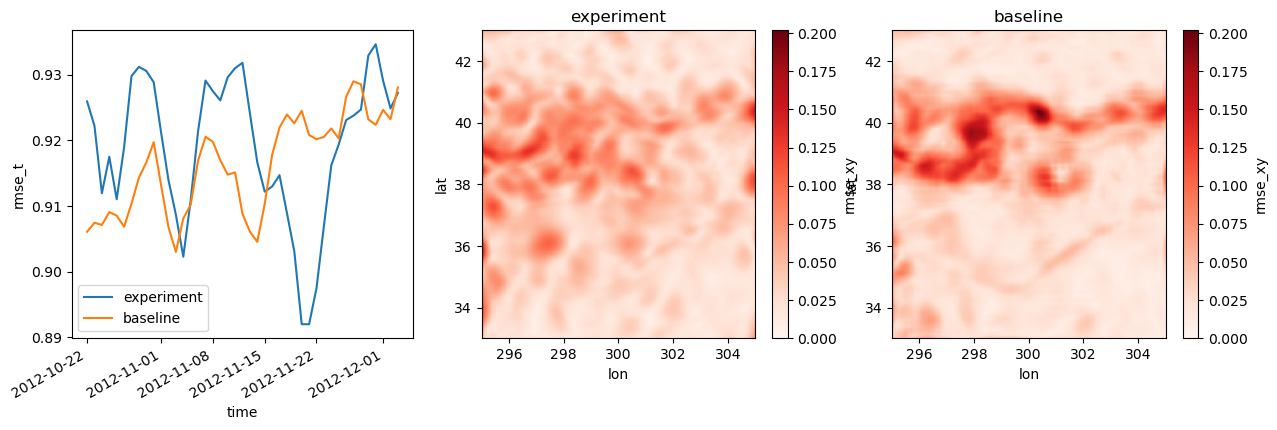

In [10]:
Diag.rmse_based_scores(plot=True)

/home/fleguillou/anaconda3/envs/massh/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/fleguillou/anaconda3/envs/massh/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/fleguillou/anaconda3/envs/massh/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


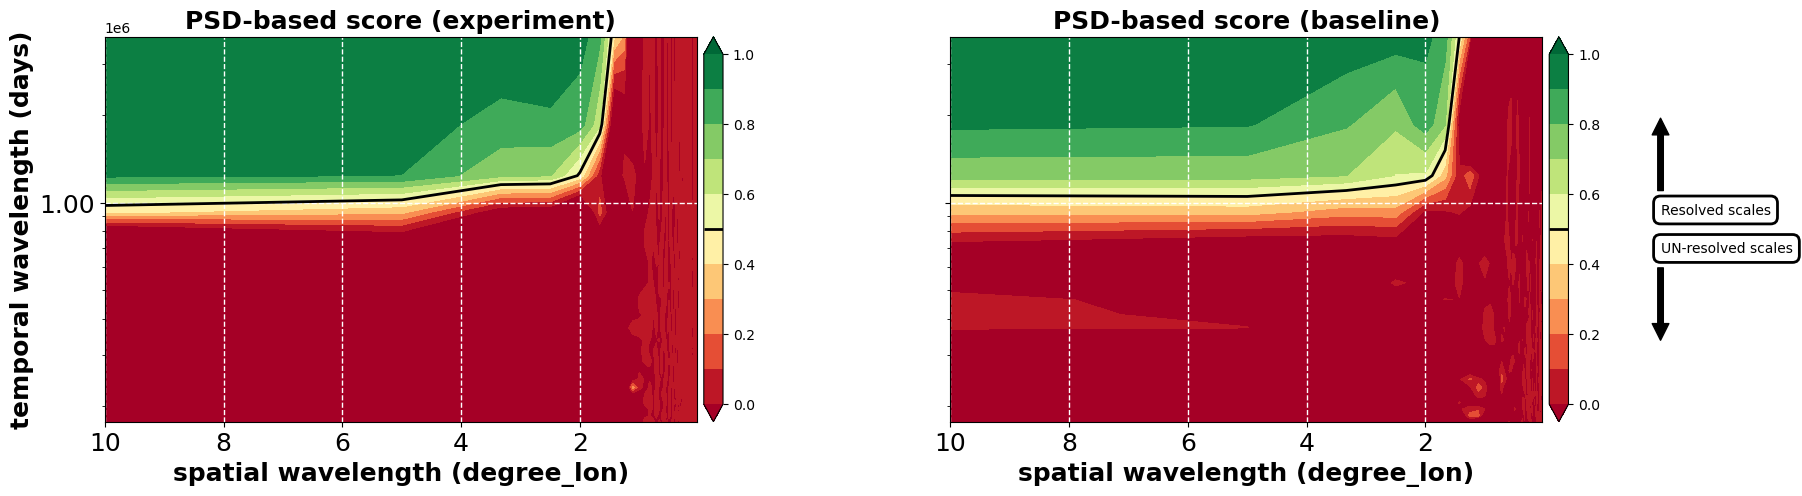

In [11]:
Diag.psd_based_scores(plot=True)

In [12]:
Diag.movie(framerate=12)

ffmpeg -f image2 -r 12 -pattern_type glob -i diags/2020a_OI/frame_*.png -y -c:v libx264 -preset veryslow -crf 15 -pix_fmt yuv420p -r 12 diags/2020a_OI/movie.mp4


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/home/fleguillou/anaconda3/envs/massh --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc

In [13]:
import os
from IPython.display import Video
Video(os.path.join(Diag.dir_output, 'movie.mp4'))

In [14]:
Leaderboard = Diag.Leaderboard()
Leaderboard

,Method,µ(RMSE),σ(RMSE),λx (degree),λt (days)
0,2020a_OI,0.92,0.01,1.47,11.32
1,baseline,0.92,0.01,1.43,12.16
